## Ana CNN

In [1]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [3]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn

In [164]:
ipath  = os.environ['LPRDATADIR']+'cnn/'

pressure   = '13bar'
projection = ('x', 'y')
widths     = [(20, 20), (15, 15), (10, 10), (5, 5)]
frame      = dp.frames[pressure]
names      = ['esum']
ifile      = 'cnn_esum__'+dp.xymm_filename(projection, widths[0], frame, prefix = 'xymm_'+pressure)
print(ifile)


cnn_esum__xymm_13bar_xy_20x20_100.npz


In [165]:
def roc(pressure, widths):
    frame = dp.frames[pressure]
    ydir, ypdir  = {}, {}
    plt.figure()
    for width in widths:
        ifile       = 'cnn_esum___'+dp.xymm_filename(projection, width, frame, prefix = 'xymm_'+pressure)
        cnndata     = np.load(ipath + ifile)
        name = dp.str_concatenate(width, 'x')
        ydir[name]  = cnndata['y'] .flatten()
        ypdir[name] = cnndata['yp'].flatten()
        yr, ys = cnn.roc_vals(ydir[name], ypdir[name])
        plt.plot(yr, ys, label = name, lw = 2)
        plt.xlim((0.9, 1.))
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    plt.title(pressure);
    plt.savefig('roc_'+pressure+'.png')


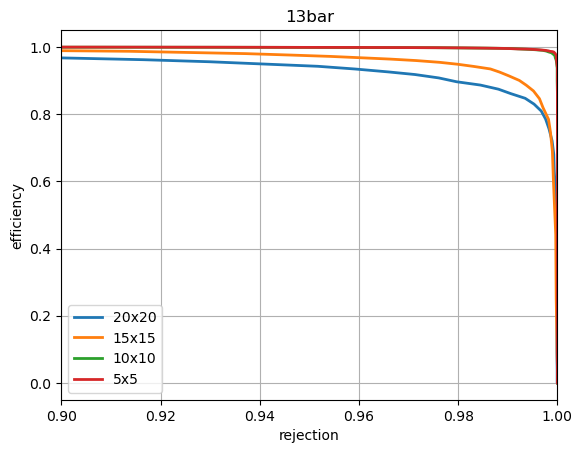

In [166]:
roc(pressure, widths)


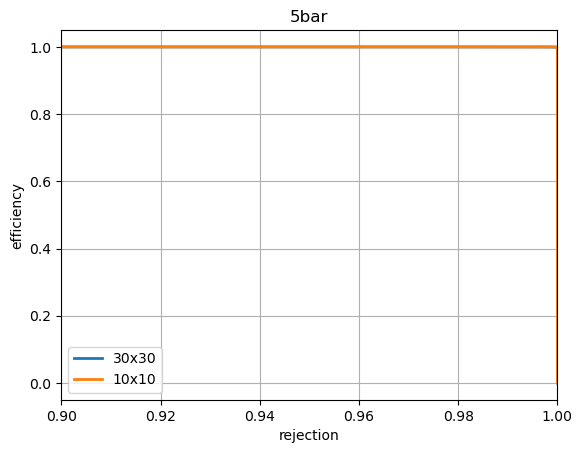

In [167]:
roc('5bar', ((30, 30), (10, 10)))

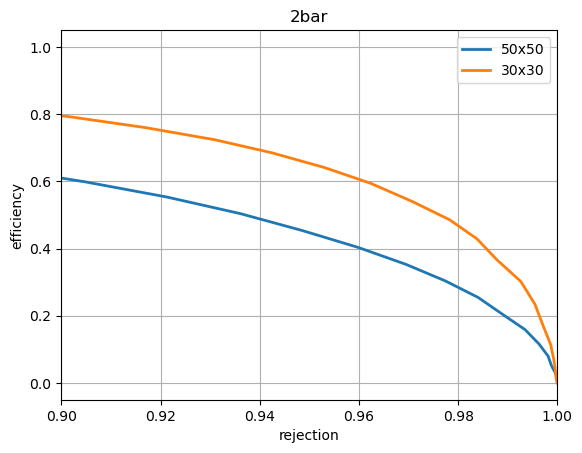

In [193]:
roc('2bar', ((50, 50), (30, 30)))

In [178]:
def plot_event(idata, odata):
    i0   = odata['index'][0]
    size = odata['index'][1] - i0
    ievt = int(np.random.choice(size, 1))
    kevt = i0 + ievt
    print('event ', kevt)
    y0   = idata.y[kevt]
    yt0  = odata['y'][ievt]
    ytp  = odata['yp'][ievt]
    print('target test      ', int(y0))
    print('target test      ', int(yt0))
    print('target test pred ', float(ytp))
    dp.plot_imgs(idata.xdic, kevt, ['esum',])
    print('total esum       ', np.sum(idata.xdic['esum'][kevt]))
    dp.plot_imgs(idata.zdic, kevt, ['seg', 'ext'])
    return

## Events

In [194]:
## Ana events
pressure   = '2bar'
projection = ('x', 'y')
width      = (30, 30)
frame      = dp.frames[pressure]
names      = ['esum']

path  = os.environ["LPRDATADIR"]
xpath = path+'xymm/'
ipath = path+'cnn/'
xfile = dp.xymm_filename(projection, width, frame, 'xymm_'+pressure)
ofile = 'cnn_esum___' + xfile

idata  = dp.load(xpath + xfile)
odata  = np.load(ipath + ofile)
#dp.plot_imgs(idata.xdic, ['esum',])

event  204404
target test       0
target test       0
target test pred  0.7115719318389893
total esum        0.950622135782998


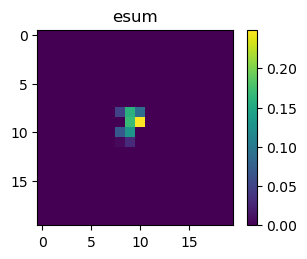

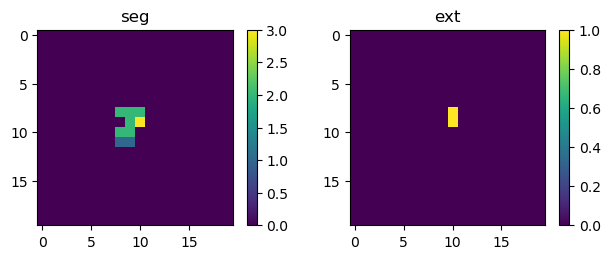

<Figure size 640x480 with 0 Axes>

In [204]:
plot_event(idata, odata)